# Predicting Diabetes in Patients 

For this project, I will apply decision trees to a data set used to predict whether someone has diabetes. In this project, I have tried out different approaches for improving the prediction. 

I will use a subset of the diabetes data set provided by the UCI machine learning repository. Additional details about the data set can be found here:

https://archive.ics.uci.edu/ml/datasets/diabetes

Medical data can also be sensitive, with consequential outcomes for patients and research. Especially if there are inequities in the medical systems, access to healthcare, way of collecting data, and generalizing data from one population to another. These are important things to keep in mind when dealing with any dataset.

In [18]:
# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import seaborn as sns

In [19]:
# Load the data set
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# Select features
# Ideally we would select features in consultation with a domain expert. Since that is not always possible, there are methods for identifying the most relevant featuers. As a start, we will select all but the outcome variable.


x = df.drop(['Outcome'], axis=1)
y = df.Outcome

#### As per my initial understanding of the dataset, I think the features 'Insulin', 'Age', 'Glucose', and 'Blood Pressure' would be most predictive. I expect the feature 'Glucose' to be at the root of the tree.

In [21]:
# Load libraries for applying decision trees

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

In [22]:
# Set up the training and test variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [23]:
# Evaluation of the results. 

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.56      0.53      0.54        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154

Accuracy: 68.18181818181817


array([[76, 23],
       [26, 29]])

An important thing to note here is that accuracy alone might not be a good evaluation metric when predicting diabetes due to class imbalance in the dataset. In many real-world scenarios, especially in medical or health-related datasets like predicting diabetes, the classes might not be distributed equally. For instance, in a diabetes prediction task, the number of non-diabetic (negative) cases might be significantly higher than the number of diabetic (positive) cases or vice versa.

Consider a scenario where the dataset contains 90% non-diabetic cases and only 10% diabetic cases. If a model predicts all instances as non-diabetic, it will achieve a high accuracy of 90%. However, such a model completely disregards the minority class of diabetic cases, which is crucial to identify in a medical context.

In cases like predicting diabetes, where the cost of misclassifying positive cases (diabetic individuals) is high, evaluation metrics that consider both false positives and false negatives are more informative. Some other metrics that we can look at are precision, recall, and the F1 score. Therefore, I have created a confusion matrix as well to conduct a holistic evaluation of the model. 

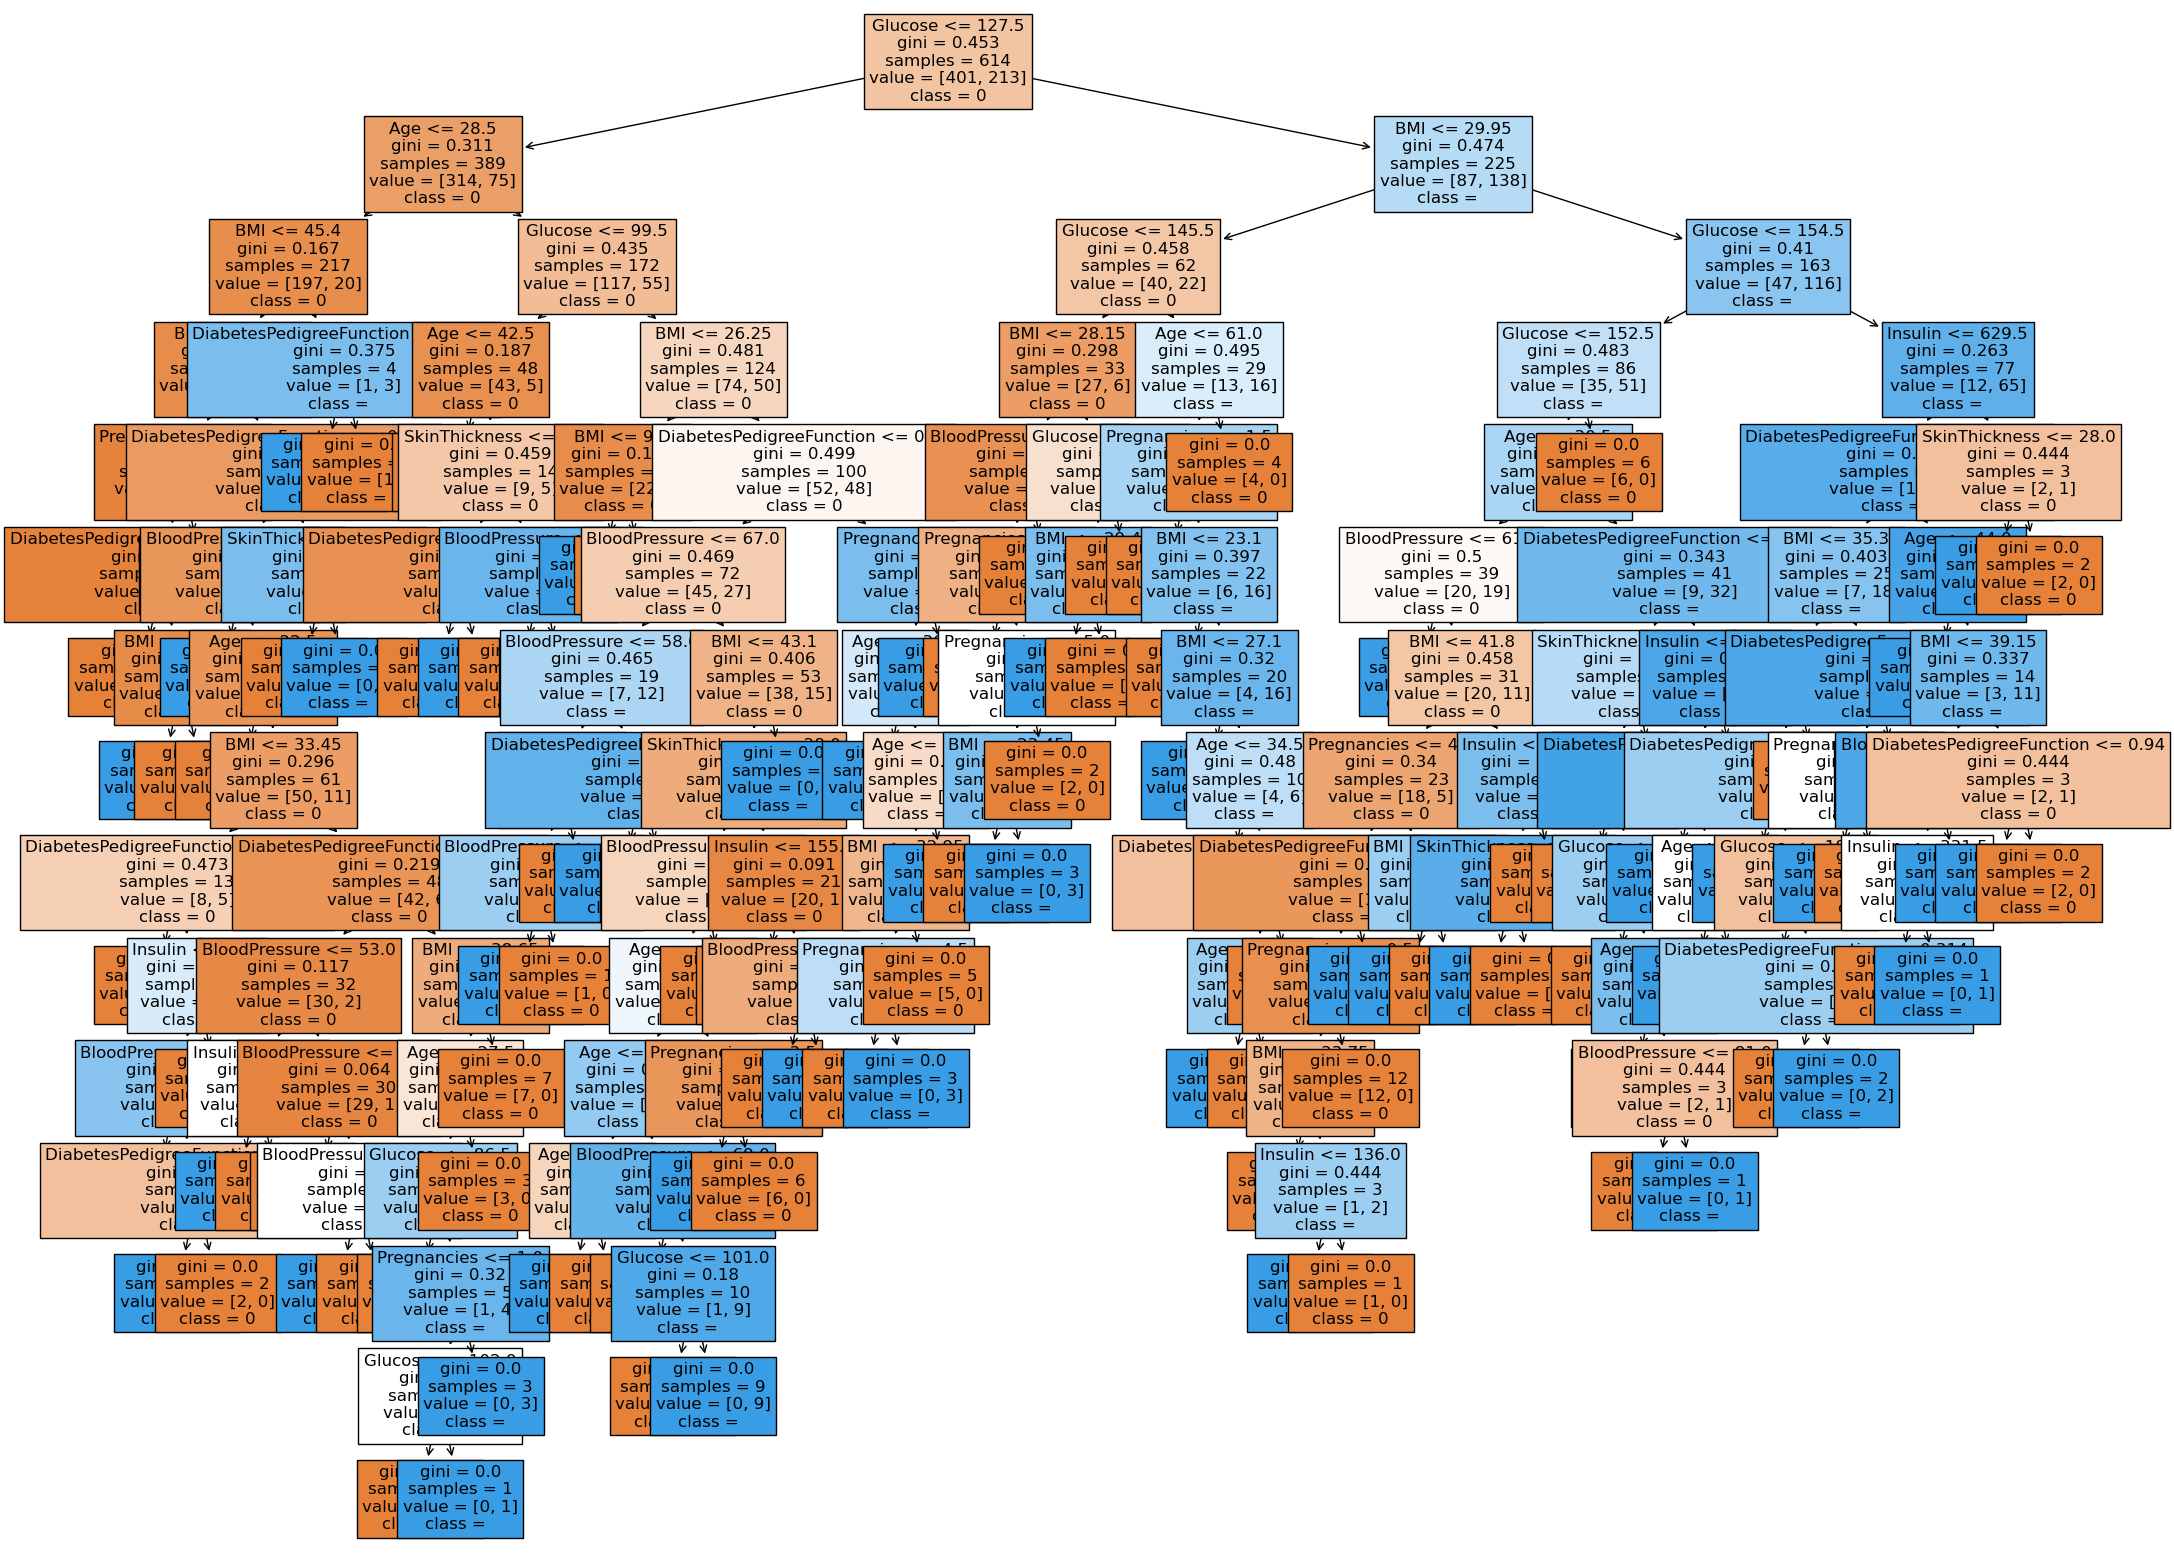

In [24]:
# Visualizing Decision Trees

# One of the advantages of decision trees is that they are easier to interpret, especially when you can visualize them.

feature_names = df.columns[:8]
target_names = df['Outcome']

fig = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(model, 
                   feature_names=feature_names,  
                   class_names=str(target_names),
                   filled=True, fontsize=12)

In [25]:
# Improve the model

#Method 1: Random Forests

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100)

model_rf.fit(x_train,y_train)

y_pred_rf = model_rf.predict(x_test)

In [26]:
# Evaluating the results

print(classification_report(y_test,y_pred_rf))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf)*100)
confusion_matrix(y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        99
           1       0.78      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

Accuracy: 81.16883116883116


array([[89, 10],
       [19, 36]])

In [27]:
#Method 2: Adaboost

from sklearn.ensemble import AdaBoostClassifier
model_ab = AdaBoostClassifier(random_state=100)

model_ab.fit(x_train,y_train)

y_pred_ab = model_ab.predict(x_test)

In [28]:
# Evaluating the results

print(classification_report(y_test,y_pred_ab))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ab)*100)
confusion_matrix(y_test,y_pred_ab)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        99
           1       0.73      0.67      0.70        55

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

Accuracy: 79.22077922077922


array([[85, 14],
       [18, 37]])

In [29]:
# Method 3: Feature selection

x1 = df.filter(['Insulin', 'Glucose','Age', 'BloodPressure'], axis=1)
x1.head(10)

,Insulin,Glucose,Age,BloodPressure
0,0,148,50,72
1,0,85,31,66
2,0,183,32,64
3,94,89,21,66
4,168,137,33,40
5,0,116,30,74
6,88,78,26,50
7,0,115,29,0
8,543,197,53,70
9,0,125,54,96


In [30]:
y1=y

# Set up your training and test variables

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
model_selectedfeatures = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_selectedfeatures = model_selectedfeatures.fit(x1_train,y1_train)

#Predict the response for test dataset
y1_pred_selectedfeatures = model_selectedfeatures.predict(x1_test)

In [31]:
# Evaluating the results

print(classification_report(y1_test,y1_pred_selectedfeatures))
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred_selectedfeatures)*100)
confusion_matrix(y1_test,y1_pred_selectedfeatures)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        99
           1       0.50      0.38      0.43        55

    accuracy                           0.64       154
   macro avg       0.60      0.58      0.59       154
weighted avg       0.63      0.64      0.63       154

Accuracy: 64.28571428571429


array([[78, 21],
       [34, 21]])

Considering the provided evaluation metrics for precision, recall, F1-score, and accuracy, let's analyze the models:

Model 1: Random Forest 

Precision (Positive class - diabetic): 0.78
Recall (Positive class - diabetic): 0.65
F1-score (Positive class - diabetic): 0.71
Accuracy: 81.17%


Model 2: Adaboost

Precision (Positive class - diabetic): 0.73
Recall (Positive class - diabetic): 0.67
F1-score (Positive class - diabetic): 0.70
Accuracy: 79.22%


Model 3: Feature Selection

Precision (Positive class - diabetic): 0.49
Recall (Positive class - diabetic): 0.38
F1-score (Positive class - diabetic): 0.43
Accuracy: 63.64%


Based on these metrics:
Model 1 appears to have the highest overall performance with relatively better precision, recall, and F1-score compared to the other models.
Model 2 follows closely but slightly underperforms compared to Model 1.
Model 3 has the lowest performance metrics among the three models.

Considering a balance between precision and recall is often crucial in medical predictions, Model 1 seems to strike a better balance between correctly identifying diabetic cases (recall) while minimizing false positives (precision). Hence, Model 1 is the best choice among these models for predicting diabetes in this scenario.